In [1]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
supply_data= pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')
supply_data['Date'] = pd.to_datetime(supply_data['Date'])
supply_data = supply_data.sort_values('Date')
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

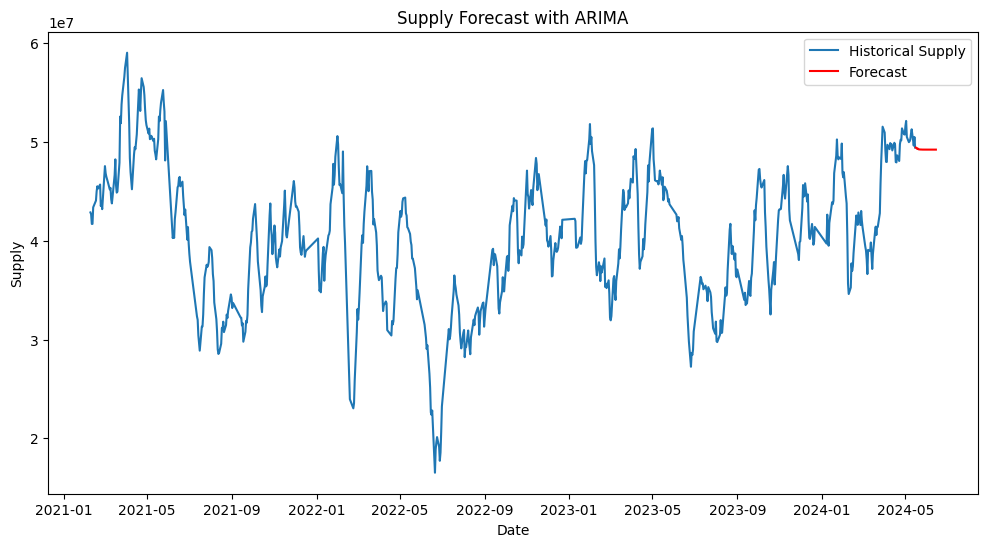

738    4.944754e+07
739    4.940336e+07
740    4.931649e+07
741    4.934349e+07
742    4.926912e+07
743    4.926348e+07
744    4.925568e+07
745    4.925025e+07
746    4.924977e+07
747    4.924434e+07
748    4.924335e+07
749    4.924246e+07
750    4.924203e+07
751    4.924182e+07
752    4.924139e+07
753    4.924127e+07
754    4.924118e+07
755    4.924113e+07
756    4.924110e+07
757    4.924107e+07
758    4.924105e+07
759    4.924105e+07
760    4.924104e+07
761    4.924104e+07
762    4.924103e+07
763    4.924103e+07
764    4.924103e+07
765    4.924103e+07
766    4.924103e+07
767    4.924103e+07
Name: predicted_mean, dtype: float64

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data for ARIMA

supply_data.set_index('Date', inplace=True)
supply_series = supply_data['Supply']

# Fit an ARIMA model (p, d, q) values will be set arbitrarily; we can optimize these later
model = ARIMA(supply_series, order=(5, 1, 0))  # p=5, d=1 (differencing), q=0
arima_result = model.fit()

# Forecast for the next 30 days
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=supply_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(supply_series, label='Historical Supply')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Supply Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

forecast

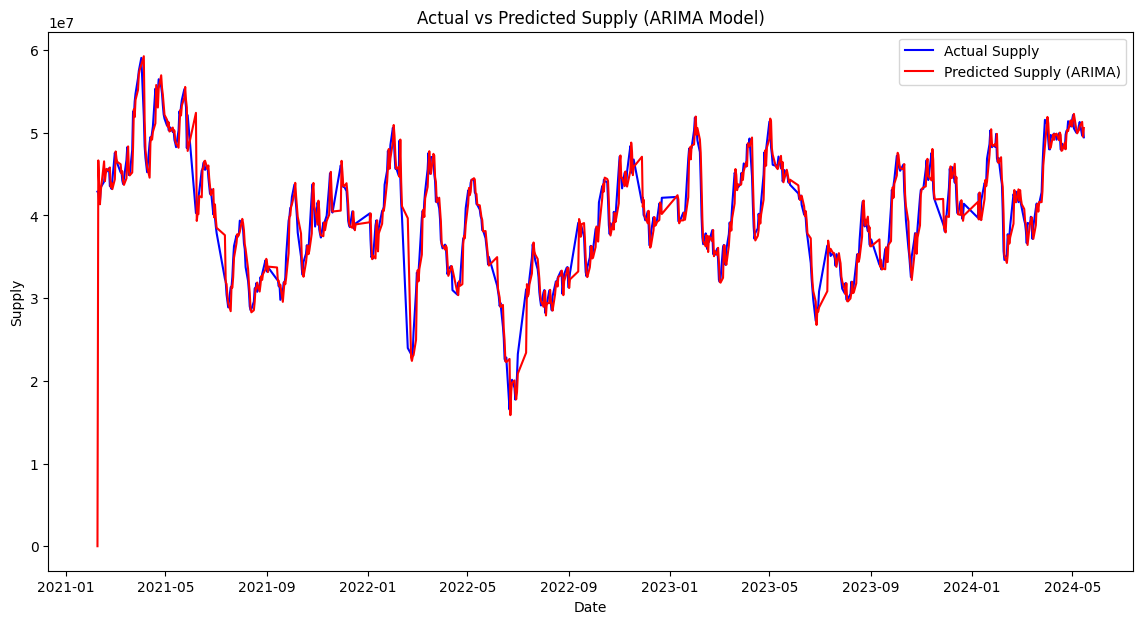

(np.float64(1368097.356511629), np.float64(2422796.530440938))

In [4]:
# In-sample predictions on the existing data
supply_data['Predicted Supply'] = arima_result.fittedvalues

# Calculate error metrics
mae = mean_absolute_error(supply_data['Supply'], supply_data['Predicted Supply'])
rmse = np.sqrt(mean_squared_error(supply_data['Supply'], supply_data['Predicted Supply']))

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(supply_data.index, supply_data['Supply'], label='Actual Supply', color='blue')
plt.plot(supply_data.index, supply_data['Predicted Supply'], label='Predicted Supply (ARIMA)', color='red')
plt.title('Actual vs Predicted Supply (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

mae, rmse

In [5]:
# Calculate R-squared
ss_total = np.sum((supply_data['Supply'] - supply_data['Supply'].mean())**2)
ss_residual = np.sum((supply_data['Supply'] - supply_data['Predicted Supply'])**2)
r_squared = 1 - (ss_residual / ss_total)

r_squared


np.float64(0.8800440514562554)

In [6]:
import itertools
import statsmodels.api as sm

# Define the range of parameters
p = range(0, 4)
d = range(0, 3)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')
best_params = None

for param in pdq:
    try:
        model = sm.tsa.ARIMA(supply_data['Supply'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_params = param
    except:
        continue

print(f"Best Parameters: {best_params}, AIC: {best_aic}")


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

Best Parameters: (3, 1, 3), AIC: 23342.981033943382


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

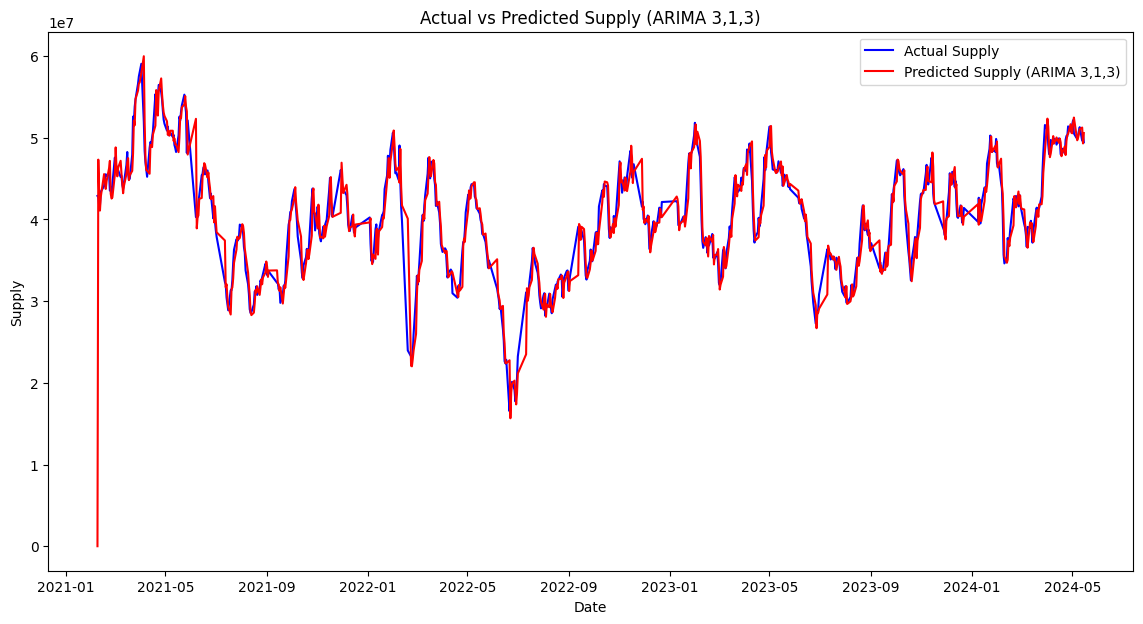

(np.float64(1334826.5705094198), np.float64(2399033.634009716))

In [7]:
# Fit ARIMA with the selected parameters (3, 1, 3)
model_best = ARIMA(supply_data['Supply'], order=(3, 1, 3))
arima_result_best = model_best.fit()

# Add predictions to the dataset
supply_data['Predicted Supply (3,1,3)'] = arima_result_best.fittedvalues

# Plot actual vs predicted values for the best model
plt.figure(figsize=(14, 7))
plt.plot(supply_data['Supply'], label='Actual Supply', color='blue')
plt.plot(supply_data['Predicted Supply (3,1,3)'], label='Predicted Supply (ARIMA 3,1,3)', color='red')
plt.title('Actual vs Predicted Supply (ARIMA 3,1,3)')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

# Calculate error metrics
mae_best = mean_absolute_error(supply_data['Supply'], supply_data['Predicted Supply (3,1,3)'])
rmse_best = np.sqrt(mean_squared_error(supply_data['Supply'], supply_data['Predicted Supply (3,1,3)']))

mae_best, rmse_best


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


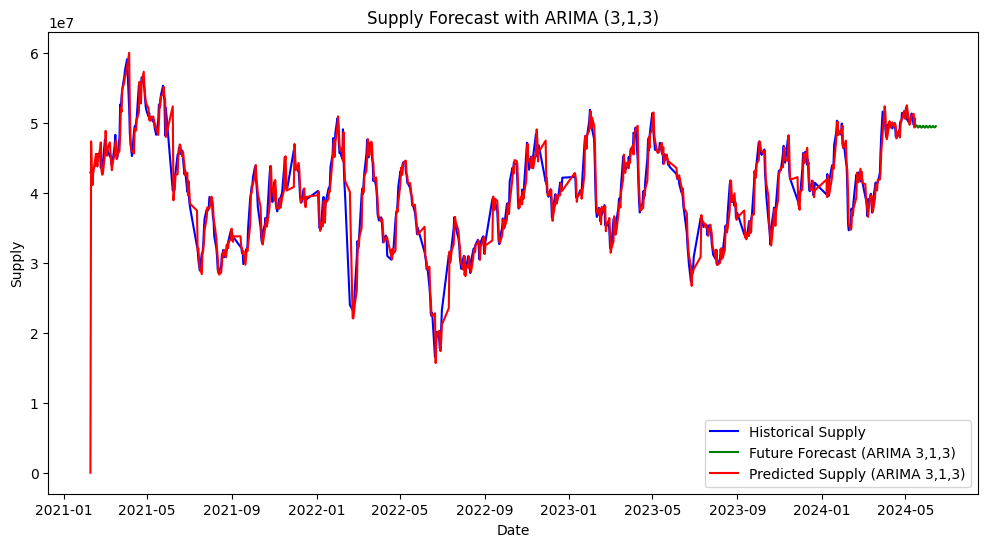

(np.float64(0.8823855785523311),
          Date  Forecasted Supply
 20 2024-06-05       4.953833e+07
 21 2024-06-06       4.945386e+07
 22 2024-06-07       4.931485e+07
 23 2024-06-08       4.932681e+07
 24 2024-06-09       4.946779e+07
 25 2024-06-10       4.952722e+07
 26 2024-06-11       4.942030e+07
 27 2024-06-12       4.930872e+07
 28 2024-06-13       4.935629e+07
 29 2024-06-14       4.948859e+07)

In [8]:
# Calculate R-squared for the ARIMA (3,1,3) model
ss_total_best = np.sum((supply_data['Supply'] - supply_data['Supply'].mean())**2)
ss_residual_best = np.sum((supply_data['Supply'] - supply_data['Predicted Supply (3,1,3)'])**2)
r_squared_best = 1 - (ss_residual_best / ss_total_best)

# Future predictions for the next 30 days
future_forecast = arima_result_best.forecast(steps=30)
forecast_index_best = pd.date_range(start=supply_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(supply_data['Supply'], label='Historical Supply', color='blue')
plt.plot(forecast_index_best, future_forecast, label='Future Forecast (ARIMA 3,1,3)', color='green')
plt.plot(supply_data['Predicted Supply (3,1,3)'], label='Predicted Supply (ARIMA 3,1,3)', color='red')
plt.title('Supply Forecast with ARIMA (3,1,3)')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()

# Display R-squared and forecasted values
forecast_df_best = pd.DataFrame({'Date': forecast_index_best, 'Forecasted Supply': future_forecast.values})
r_squared_best, forecast_df_best.tail(10)
